<a href="https://colab.research.google.com/github/VoorugondaAnushka/XGaming-Fraud-Detection-using-Random-Forest/blob/main/ADM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
 datetime       0
category       0
type           0
description    7
wallet         6
amount         0
end_balance    0
hour           0
day            0
week           0
month          0
quarter        0
year           0
tod            0
session_id     0
suspicious     0
dtype: int64

Class Balance:
 suspicious
0    101370
1     16081
Name: count, dtype: int64


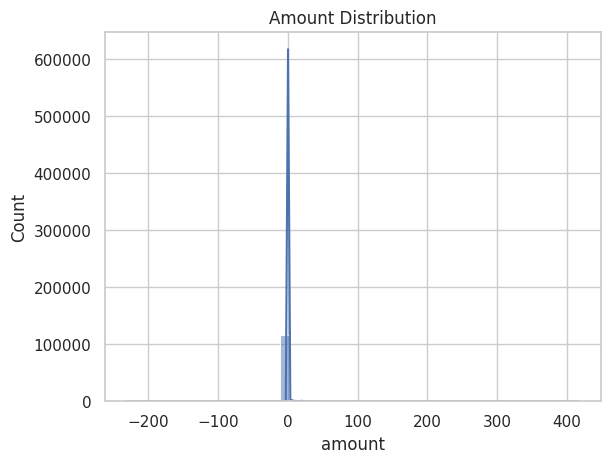

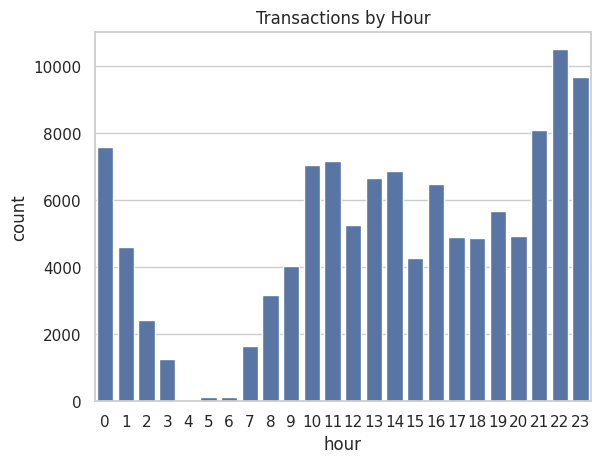

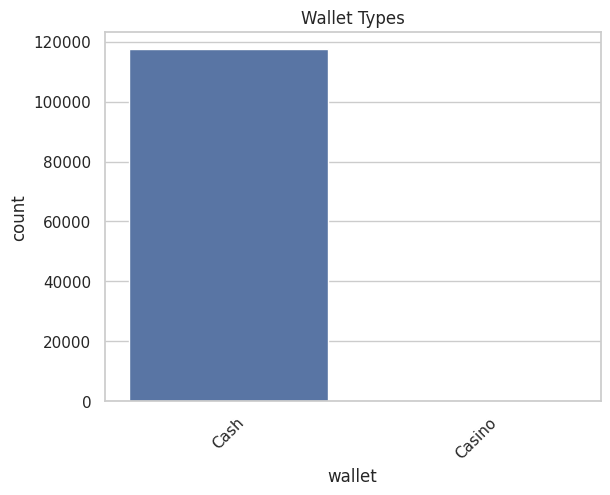

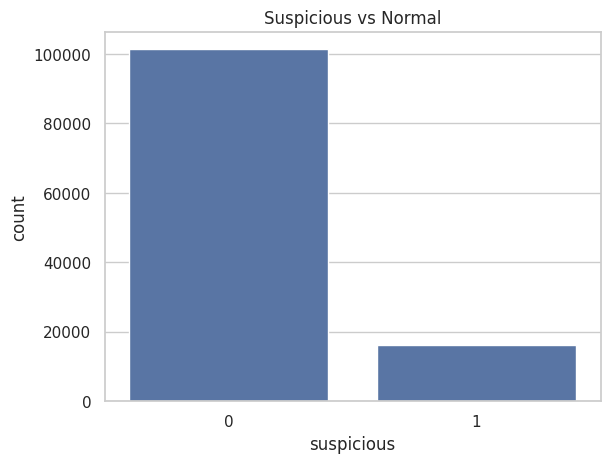


✅ Accuracy: 1.0

✅ Confusion Matrix:
 [[30464     0]
 [    0  4772]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30464
           1       1.00      1.00      1.00      4772

    accuracy                           1.00     35236
   macro avg       1.00      1.00      1.00     35236
weighted avg       1.00      1.00      1.00     35236


New Transaction Prediction: 🚨 Fraud Detected!


In [ ]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load CSV
df = pd.read_csv("/content/Transaction-Report_20241231-expanded (1).csv.xz")

# Step 3: Create 'suspicious' label using rules
df['suspicious'] = 0
df.loc[(df['amount'] > 5000) | (df['amount'] < -5000), 'suspicious'] = 1
df.loc[df['hour'].between(0, 5), 'suspicious'] = 1
df.loc[df['wallet'].isin(['Casino', 'Credit']), 'suspicious'] = 1

# Step 4: EDA
print("Missing Values:\n", df.isnull().sum())
print("\nClass Balance:\n", df['suspicious'].value_counts())

sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Amount Distribution")
plt.show()

sns.countplot(x='hour', data=df)
plt.title("Transactions by Hour")
plt.show()

sns.countplot(x='wallet', data=df)
plt.title("Wallet Types")
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='suspicious', data=df)
plt.title("Suspicious vs Normal")
plt.show()

# Step 5: Drop unneeded columns
df.drop(['datetime', 'description'], axis=1, inplace=True)

# Step 6: Label encode object columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoder

# Step 7: Add feature
df['amount_to_balance'] = df['amount'] / (df['end_balance'] + 1)

# Step 8: Prepare data
X = df.drop('suspicious', axis=1)
y = df['suspicious']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 9: Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 10: Evaluate
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# Step 11: Predict new transaction
def predict_transaction(new_data):
    new_df = pd.DataFrame([new_data])

    # Encode each column safely
    for col in label_encoders:
        le = label_encoders[col]
        val = new_df[col][0]

        # Check if value is in the known classes, and decode if it is encoded
        if val in le.classes_:
            new_df[col] = le.transform([val])  # Encode the value
        else:
            print(f"❌ Can't predict: unknown value '{val}' in column '{col}'")
            return "❌ Cannot Predict: Invalid Value"

    # Add new feature
    new_df['amount_to_balance'] = new_df['amount'] / (new_df['end_balance'] + 1)
    new_df = new_df[X.columns]

    # Scale and predict
    new_scaled = scaler.transform(new_df)
    result = model.predict(new_scaled)

    return "🚨 Fraud Detected!" if result[0] == 1 else "✅ Safe Transaction"

# Example test transaction with valid encoded wallet value
new_transaction = {
    'category': 'Gaming',
    'type': 'Stake',
    'wallet': 'Cash',  # This is the encoded value for 'Credit' (adjust accordingly)
    'amount': 8000,
    'end_balance': 3000,
    'hour': 2,
    'day': 5,
    'week': 14,
    'month': 3,
    'quarter': 1,
    'year': 2024,
    'tod': 'night',
    'session_id': 12345,
    'amount_to_balance': 0  # Will be calculated
}

# Predict result
result = predict_transaction(new_transaction)
print("\nNew Transaction Prediction:", result)




Missing Values:
 datetime       0
category       0
type           0
description    7
wallet         6
amount         0
end_balance    0
hour           0
day            0
week           0
month          0
quarter        0
year           0
tod            0
session_id     0
suspicious     0
dtype: int64

Class Balance:
 suspicious
0    101370
1     16081
Name: count, dtype: int64


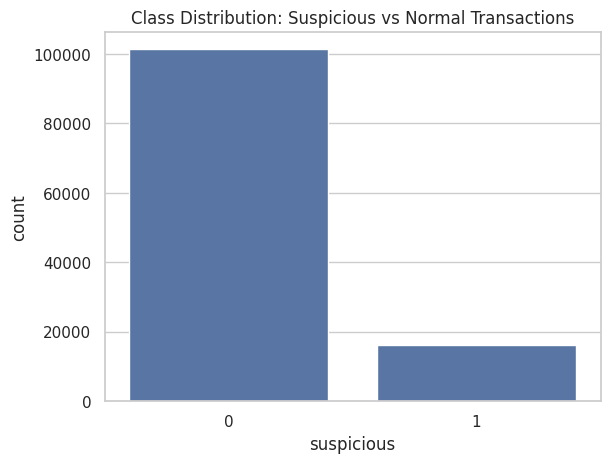

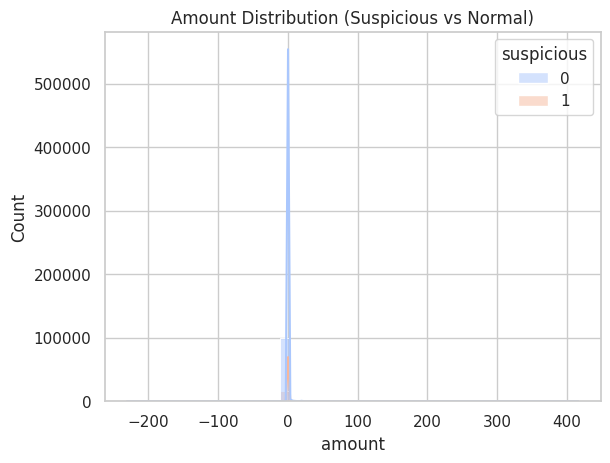

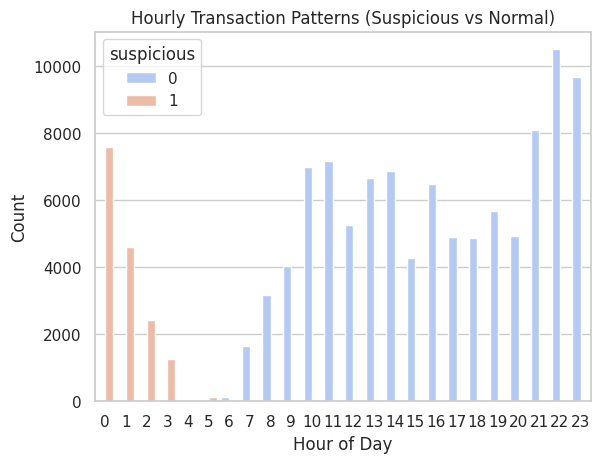

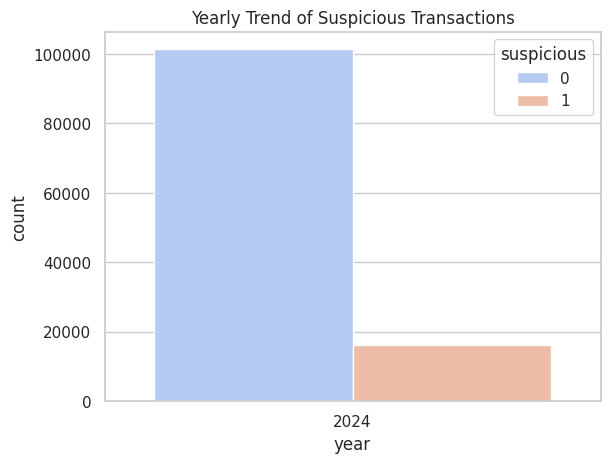

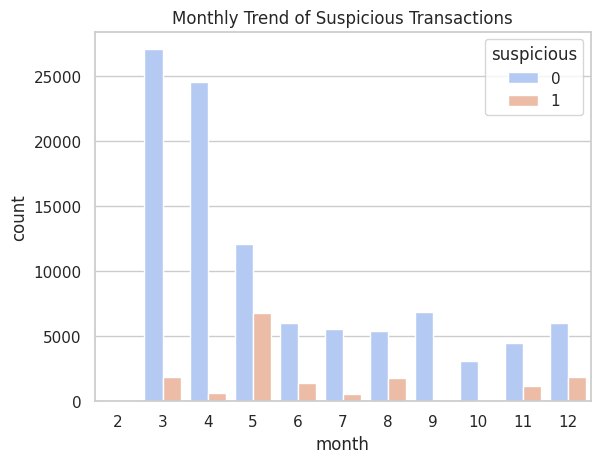

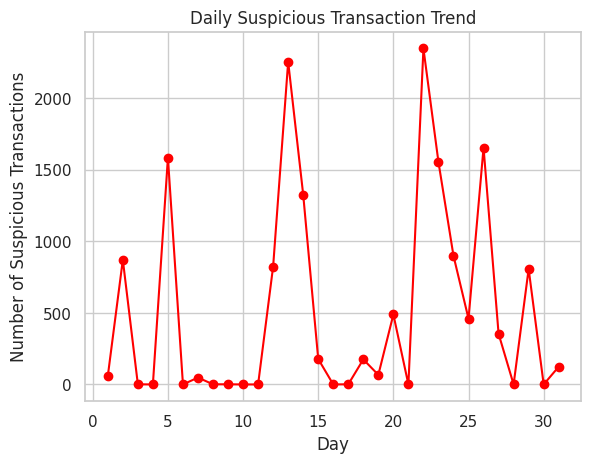

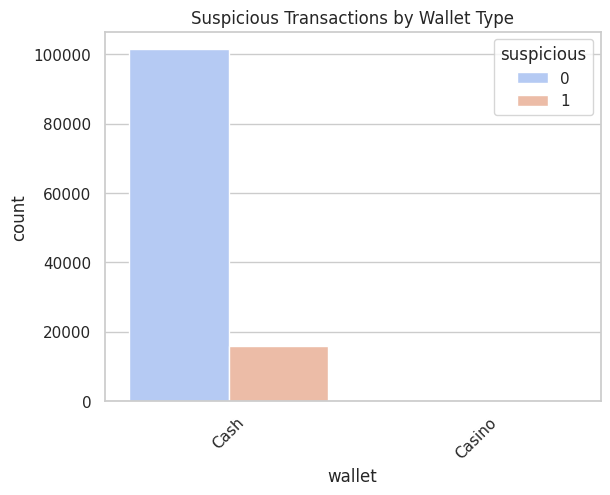

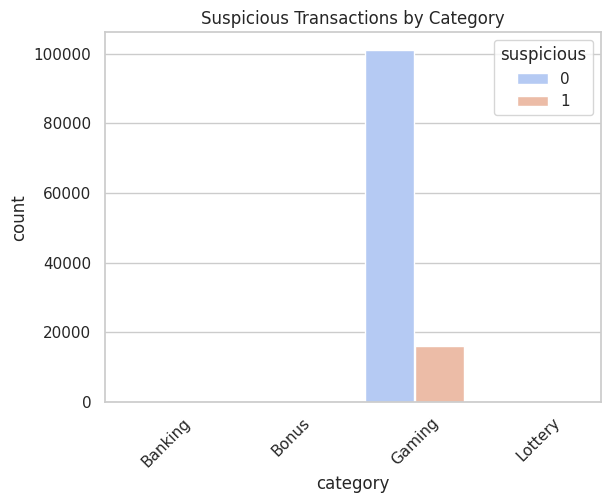

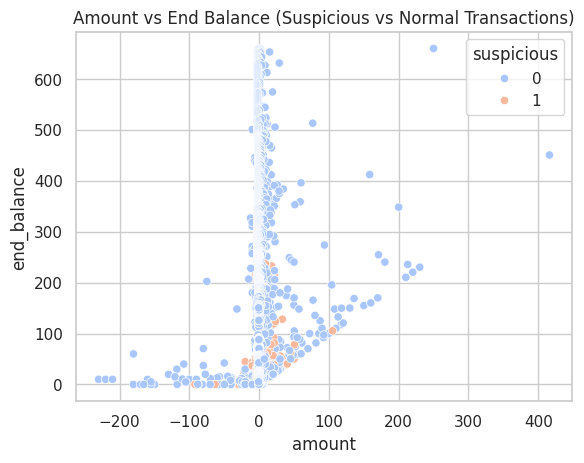


✅ Accuracy: 1.0

✅ Confusion Matrix:
 [[30464     0]
 [    0  4772]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30464
           1       1.00      1.00      1.00      4772

    accuracy                           1.00     35236
   macro avg       1.00      1.00      1.00     35236
weighted avg       1.00      1.00      1.00     35236


New Transaction Prediction: 🚨 Fraud Detected!


In [ ]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load CSV
df = pd.read_csv("/content/Transaction-Report_20241231-expanded (1).csv.xz")

# Step 3: Create 'suspicious' label using rules
df['suspicious'] = 0
df.loc[(df['amount'] > 5000) | (df['amount'] < -5000), 'suspicious'] = 1
df.loc[df['hour'].between(0, 5), 'suspicious'] = 1
df.loc[df['wallet'].isin(['Casino', 'Credit']), 'suspicious'] = 1

# Step 4: EDA - Initial Insights
print("Missing Values:\n", df.isnull().sum())
print("\nClass Balance:\n", df['suspicious'].value_counts())

# 1. **Class Distribution Analysis**: Visualize the balance between fraudulent and normal transactions
sns.countplot(x='suspicious', data=df)
plt.title("Class Distribution: Suspicious vs Normal Transactions")
plt.show()

# 2. **Amount Distribution**: Visualize the distribution of transaction amounts highlighting suspicious vs non-suspicious
sns.histplot(df, x='amount', bins=50, kde=True, hue='suspicious', palette="coolwarm")
plt.title("Amount Distribution (Suspicious vs Normal)")
plt.show()

# 3. **Hourly Transaction Patterns**: Visualize hourly transaction patterns for fraud
sns.countplot(x='hour', hue='suspicious', data=df, palette='coolwarm')
plt.title("Hourly Transaction Patterns (Suspicious vs Normal)")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

# 4. **Yearly and Monthly Trend**: Show yearly trend of suspicious vs non-suspicious transactions
sns.countplot(x='year', hue='suspicious', data=df, palette='coolwarm')
plt.title("Yearly Trend of Suspicious Transactions")
plt.show()

# Monthly Trend of Suspicious Transactions
sns.countplot(x='month', hue='suspicious', data=df, palette='coolwarm')
plt.title("Monthly Trend of Suspicious Transactions")
plt.show()

# 5. **Daily Suspicious Transaction Trend**: Time-series line plot for day-wise fraud spikes
df.groupby('day')['suspicious'].sum().plot(kind='line', marker='o', color='red')
plt.title("Daily Suspicious Transaction Trend")
plt.xlabel("Day")
plt.ylabel("Number of Suspicious Transactions")
plt.show()

# 6. **Wallet Type & Category-wise Analysis**: Fraud-prone wallets and categories
sns.countplot(x='wallet', hue='suspicious', data=df, palette='coolwarm')
plt.title("Suspicious Transactions by Wallet Type")
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='category', hue='suspicious', data=df, palette='coolwarm')
plt.title("Suspicious Transactions by Category")
plt.xticks(rotation=45)
plt.show()

# 7. **Amount vs End Balance Scatter Plot**: Relationship between amount and end balance for suspicious transactions
sns.scatterplot(x='amount', y='end_balance', hue='suspicious', data=df, palette='coolwarm')
plt.title("Amount vs End Balance (Suspicious vs Normal Transactions)")
plt.show()





# Step 5: Drop unneeded columns
df.drop(['datetime', 'description'], axis=1, inplace=True)

# Step 6: Label encode object columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoder

# Step 7: Add feature
df['amount_to_balance'] = df['amount'] / (df['end_balance'] + 1)

# Step 8: Prepare data
X = df.drop('suspicious', axis=1)
y = df['suspicious']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 9: Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 10: Evaluate
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# Step 11: Predict new transaction
def predict_transaction(new_data):
    new_df = pd.DataFrame([new_data])

    # Encode each column safely
    for col in label_encoders:
        le = label_encoders[col]
        val = new_df[col][0]

        # Check if value is in the known classes, and decode if it is encoded
        if val in le.classes_:
            new_df[col] = le.transform([val])  # Encode the value
        else:
            print(f"❌ Can't predict: unknown value '{val}' in column '{col}'")
            return "❌ Cannot Predict: Invalid Value"

    # Add new feature
    new_df['amount_to_balance'] = new_df['amount'] / (new_df['end_balance'] + 1)
    new_df = new_df[X.columns]

    # Scale and predict
    new_scaled = scaler.transform(new_df)
    result = model.predict(new_scaled)

    return "🚨 Fraud Detected!" if result[0] == 1 else "✅ Safe Transaction"

# Example test transaction with valid encoded wallet value
new_transaction = {
    'category': 'Gaming',
    'type': 'Stake',
    'wallet': 'Cash',  # This is the encoded value for 'Credit' (adjust accordingly)
    'amount': 8000,
    'end_balance': 3000,
    'hour': 2,
    'day': 5,
    'week': 14,
    'month': 3,
    'quarter': 1,
    'year': 2024,
    'tod': 'night',
    'session_id': 12345,
    'amount_to_balance': 0  # Will be calculated
}

# Predict result
result = predict_transaction(new_transaction)
print("\nNew Transaction Prediction:", result)
